In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
FBRandom = pd.read_csv('FBRandom.csv1.txt', delim_whitespace=True)
DinRandom = pd.read_csv('DinRandom.csv1.txt', delim_whitespace=True)
BackFactRandom = pd.read_csv('BackRandom.csv1.txt', delim_whitespace=True)

FBRandom2 = pd.read_csv('FBRandom.csv2.txt', delim_whitespace=True)
DinRandom2 = pd.read_csv('DinRandom.csv2.txt', delim_whitespace=True)
BackFactRandom2 = pd.read_csv('BackRandom.csv2.txt', delim_whitespace=True)

FBRandom3 = pd.read_csv('FBRandom.csv3.txt', delim_whitespace=True)
DinRandom3 = pd.read_csv('DinRandom.csv3.txt', delim_whitespace=True)
BackFactRandom3 = pd.read_csv('BackRandom.csv3.txt', delim_whitespace=True)

general = FBRandom

general['tiempoDin'] = (DinRandom['tiempo'] + DinRandom2['tiempo'] + DinRandom3['tiempo'])/3
general['llamadasDin'] = (DinRandom['llamadas'] + DinRandom2['llamadas'] + DinRandom3['llamadas'])//3

general['tiempoBack'] = (BackFactRandom['tiempo'] + BackFactRandom2['tiempo'] + BackFactRandom['tiempo'])/3
general['llamadasBack'] = (BackFactRandom['llamadas'] + BackFactRandom2['llamadas'] + BackFactRandom['llamadas'])//3

#print(general)

##### Funciones para comparar

# V fijo

In [4]:
vFijoChico = general.loc[general['v'] == 16];
#print (vFijoChico)
vFijoGrande = general.loc[general['v'] == 6241];


In [30]:
nn = np.arange(1,30)
dosALaN = 2**(nn+1)
nPorD = (16+3) * (nn)
funciones = pd.DataFrame(data={'n': nn, 'llamadas': dosALaN, 'nPorD' : nPorD})


#print(funciones)

### Graficos de llamadas

###### Fuerza Bruta

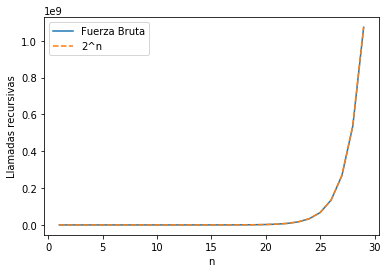

In [31]:
plot = sns.lineplot(x="n", y="llamadas", data=vFijoChico);
ax = sns.lineplot(x="n", y="llamadas", data=funciones);

ax.lines[1].set_linestyle("--")


plot.legend(["Fuerza Bruta","2^n"]);

plot.set(ylabel="Llamadas recursivas");

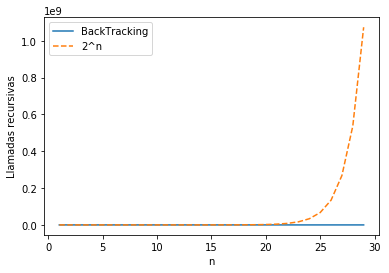

In [32]:
ax = sns.lineplot(x="n", y="llamadasBack", data=vFijoChico);
plot = sns.lineplot(x="n", y="llamadas", data=funciones);
ax.lines[1].set_linestyle("--")



plot.legend(["BackTracking","2^n"]);

plot.set(ylabel="Llamadas recursivas");

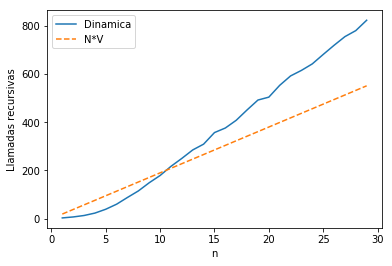

In [33]:
plot = sns.lineplot(x="n", y="llamadasDin", data=vFijoChico);
ax = sns.lineplot(x="n", y="nPorD", data=funciones);

ax.lines[1].set_linestyle("--")



plot.legend(["Dinamica","N*V"]);

plot.set(ylabel="Llamadas recursivas");

# N fijo

In [46]:
nFijoChico = general.loc[general['n'] == 2];
print (vFijoChico)
nFijoGrande = general.loc[general['n'] == 28];

     n   v       tiempo    llamadas  tiempoDin  llamadasDin  tiempoBack  \
29   1  16     0.000319           3   0.004199            3    0.000396   
30   2  16     0.000398           7   0.002125            7    0.000607   
31   3  16     0.000441          15   0.002677           13    0.000592   
32   4  16     0.000767          31   0.003235           23    0.000888   
33   5  16     0.001115          63   0.003951           39    0.000956   
34   6  16     0.002918         127   0.005111           60    0.001587   
35   7  16     0.003300         255   0.006343           88    0.001657   
36   8  16     0.005726         511   0.008655          115    0.001829   
37   9  16     0.011036        1023   0.010105          149    0.003685   
38  10  16     0.020909        2047   0.011246          179    0.004055   
39  11  16     0.039963        4095   0.012603          217    0.004336   
40  12  16     0.095003        8191   0.014093          250    0.007853   
41  13  16     0.155461  

In [47]:
vv = nFijoChico['v']

print(vv)

nnChico = np.array([2 for i in range(1,30)])
nnGrande = np.array([28 for i in range(1,30)])


dosALaNChico = 2**(nnChico)
dosALaNGrande = 2**(nnGrande)

nChicoPorD = (vv+1) * (2 + 1)
nGrandePorD = (vv+1) * (28 + 1)

funciones = pd.DataFrame(data={'dosALaNChico': dosALaNChico,'dosAlaNGrande': dosALaNGrande,
                               'nChicoPorD' : nChicoPorD, 'nGrandePorD' : nGrandePorD})

1         1
30       16
59       49
88      100
117     169
146     256
175     361
204     484
233     625
262     784
291     961
320    1156
349    1369
378    1600
407    1849
436    2116
465    2401
494    2704
523    3025
552    3364
581    3721
610    4096
639    4489
668    4900
697    5329
726    5776
755    6241
Name: v, dtype: int64


ValueError: array length 29 does not match index length 27